In [1]:
pip install -U fortran-magic

In [20]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

**Ejemplo**

In [ ]:
l1 = [1,'dos',3.5,4,6.0,"siete"]
l1

[1, 'dos', 3.5, 4, 6.0, 'siete']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


**Ejemplo**

In [ ]:
segundo = l1[1]
quiento = l1[4]
print(segundo)
print(quiento)

dos
6.0


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


**Ejemplo**

In [ ]:
ultimo = l1[-1]
primero = l1[-6]
print("ultimo", ultimo)
print("primero",primero)

ultimo siete
primero 1


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

**Ejemplo**

In [ ]:
sublista =l1[0:5]
sublista

[1, 'dos', 3.5, 4, 6.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

**Ejemplo**

In [ ]:
primeros_cinco = l[:5]
primeros_cinco

[1, 'two', 3.0, 4, 5.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

**Ejemplo**

In [ ]:
despuesdel6 = l1[6:]
despuesdel6

[]

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

**Ejemplo**


In [ ]:
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[0:7:2]

['a', 'c', 'e', 'g']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

**Ejemplo**

In [ ]:
l[::-3]

['h', 'e', 'b']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


**Ejemplo**


In [ ]:
print("antes", l1)
l1.append("the game")
print("despues", l1)

antes [1, 'dos', 3.5, 4, 6.0, 'siete']
despues [1, 'dos', 3.5, 4, 6.0, 'siete', 'the game']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

**Ejenmplo**

In [ ]:
l = [2, 4, 6, 8, 10]
[x / 2 for x in l]

[1.0, 2.0, 3.0, 4.0, 5.0]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

**eJEMPLO**

In [ ]:
philosofos = {'David': 'Hayther', 'chris': 'redfield', 'leon': 'kennedy'}
philosofos

{'David': 'Hayther', 'chris': 'redfield', 'leon': 'kennedy'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

**Ejemplo**


In [ ]:
philosofos['claire'] = 'redfield'
philosofos

{'David': 'Hayther',
 'chris': 'redfield',
 'claire': 'redfield',
 'leon': 'kennedy'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant'}

**Ejemplo**

In [ ]:
del philosofos['David']
philosofos

{'chris': 'redfield', 'claire': 'redfield', 'leon': 'kennedy'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 37 µs, sys: 4 µs, total: 41 µs
Wall time: 46.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**Ejemplo**




\begin{bmatrix}
           5 & 5 & 6 \\
           6 & 7 & 8 \\
           9 & 9 & 9
         \end{bmatrix}
         \\
         \\
\begin{bmatrix}
           8 & 8 &8 \\
           1 &2 & 3 \\
           6 & 6 & 6
         \end{bmatrix}


In [ ]:
a = [[5, 5, 6],
     [6, 7, 8],
     [9, 9, 9]]

b = [[8, 8, 8],
     [1, 2, 3],
     [6, 6, 6]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
matmul(a, b)

[[81, 86, 91], [103, 110, 117], [135, 144, 153]]

**Ejemplo final**


\begin{bmatrix}
           81 & 86 & 91 \\
           103 & 110 & 117 \\
           135 & 144 & 153
         \end{bmatrix}

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.6815004839273681, 0.38108886340911907, 0.4052356823626323],
 [0.5981735226539086, 0.13432093248940857, 0.09551826196954594]]

**Ejemplo**

\begin{bmatrix}
           x_1 & x_2 & x_3&x_4&x_5&x_6 \\
           x_1 & x_2 & x_3&x_4&x_5&x_6 \\
           x_1 & x_2 & x_3&x_4&x_5&x_6 \\
           x_1 & x_2 & x_3&x_4&x_5&x_6 \\
         \end{bmatrix}

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(4, 6)
randm

[[0.2886050562396416,
  0.47353133911203094,
  0.5938821338960393,
  0.12908420585824731,
  0.8570765520269527,
  0.6924850693478989],
 [0.86958444673892,
  0.5676065342917472,
  0.3073684086276769,
  0.6592982547908846,
  0.12886053257185537,
  0.07901127548064191],
 [0.666845256420367,
  0.8149046356718048,
  0.4367233201357603,
  0.14254480373202905,
  0.150225114972261,
  0.7310562228286652],
 [0.9692558367062925,
  0.39311365378351826,
  0.25882710916826646,
  0.4841424397731324,
  0.15483535791573155,
  0.368309284310135]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.45 s, sys: 27.1 ms, total: 9.48 s
Wall time: 9.49 s


**Ejemplo**

In [ ]:
%%time
ala = random_matrix(600, 1000)
alb = random_matrix(1000, 600)
x = matmul(ala, alb)

CPU times: user 1min 51s, sys: 250 ms, total: 1min 52s
Wall time: 1min 52s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

**Ejemplo**

In [ ]:
def producto_punto(xs,ys):
  return sum(x + y for  x,y in zip(xs,ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

**Ejemplo**

In [ ]:
%%fortran
subroutine fortranproductopunto(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs - ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

**Ejemplo**

In [ ]:
list_data1 = [float(i) for i in range(10000000)]
array_data1 = np.array(list_data1)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 13.5 ms


333328333350000.0

**Ejemplo**

In [ ]:
%%time
producto_punto(list_data1, list_data1)

CPU times: user 847 ms, sys: 1.97 ms, total: 848 ms
Wall time: 853 ms


99999990000000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 347 µs, sys: 0 ns, total: 347 µs
Wall time: 362 µs


333328333350000.0

**Ejemplo**

In [ ]:
%%time
fortranproductopunto(array_data1, array_data1)

CPU times: user 17.5 ms, sys: 0 ns, total: 17.5 ms
Wall time: 18.1 ms


0.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

**Ejemplo**

In [ ]:
def sum_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

sum_elemwise([10, 52, 13, 9], [6, 2 + 5j, 3.0, 'CUATRO'])

[60,
 (104+260j),
 39.0,
 'CUATROCUATROCUATROCUATROCUATROCUATROCUATROCUATROCUATRO']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


**Ejemplo**

In [ ]:
source_code = 'a + b * c + e / j'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 LOAD_NAME                3 (e)
             12 LOAD_NAME                4 (j)
             14 BINARY_TRUE_DIVIDE
             16 BINARY_ADD
             18 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

**Ejemplo**

In [ ]:
data1 = np.array([1.0, 2.0, 3.0, 4.0])
data1

array([1., 2., 3., 4.])

In [ ]:
data + data

array([2, 4, 6, 8])

**Ejemplo**

In [ ]:
data1+data1

array([2., 4., 6., 8.])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.32 ms, sys: 0 ns, total: 1.32 ms
Wall time: 1.34 ms


333328333350000.0

**Ejemplo**


In [ ]:
%%time
(array_data1 * array_data1* array_data1).sum()

CPU times: user 30.8 ms, sys: 21 ms, total: 51.8 ms
Wall time: 55.2 ms


2.499999500000011e+27

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

**Ejemplo**

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data*array_data)

CPU times: user 773 µs, sys: 3.97 ms, total: 4.74 ms
Wall time: 4.76 ms


2.4999500002499998e+19

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

**Ejemplo**

In [ ]:
%%time
fortran_dot_product(array_data1, array_data1)

CPU times: user 16.6 ms, sys: 955 µs, total: 17.5 ms
Wall time: 19.5 ms


0.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

**Ejemplo**

In [ ]:
tres_por_tres = data1.reshape(2,2)
tres_por_tres

array([[1., 2.],
       [3., 4.]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


**Ejemplo**

In [ ]:
arreglo = np.array([1.0, 2.0, 3.0, 4.5, 5.5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arreglo, sep='')
print("===========")
print("DType:", arreglo.dtype)
print("Shape:", arreglo.shape)
print("Strides:", arreglo.strides)
print("Data:", arreglo.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**Ejemplo**

In [ ]:
data1 = np.arange(50).reshape(10, 5)
data1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

**Ejemplo**

In [ ]:
data1*data1

array([[   0,    1,    4,    9,   16],
       [  25,   36,   49,   64,   81],
       [ 100,  121,  144,  169,  196],
       [ 225,  256,  289,  324,  361],
       [ 400,  441,  484,  529,  576],
       [ 625,  676,  729,  784,  841],
       [ 900,  961, 1024, 1089, 1156],
       [1225, 1296, 1369, 1444, 1521],
       [1600, 1681, 1764, 1849, 1936],
       [2025, 2116, 2209, 2304, 2401]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

**Ejemplo**

In [ ]:
np.sqrt(data1)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949],
       [5.        , 5.09901951, 5.19615242, 5.29150262, 5.38516481],
       [5.47722558, 5.56776436, 5.65685425, 5.74456265, 5.83095189],
       [5.91607978, 6.        , 6.08276253, 6.164414  , 6.244998  ],
       [6.32455532, 6.40312424, 6.4807407 , 6.55743852, 6.63324958],
       [6.70820393, 6.78232998, 6.8556546 , 6.92820323, 7.        ]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([False, False,  True, False])

**Ejemplo**

In [ ]:
(data1 % 10) ==0

array([[ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

**Ejemplo**

In [ ]:
((data1 % 10) ==0) & ((data1 % 5)==0)

array([[ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

**Ejemplo**

In [ ]:
data1 @ data1.T

array([[   30,    80,   130,   180,   230,   280,   330,   380,   430,
          480],
       [   80,   255,   430,   605,   780,   955,  1130,  1305,  1480,
         1655],
       [  130,   430,   730,  1030,  1330,  1630,  1930,  2230,  2530,
         2830],
       [  180,   605,  1030,  1455,  1880,  2305,  2730,  3155,  3580,
         4005],
       [  230,   780,  1330,  1880,  2430,  2980,  3530,  4080,  4630,
         5180],
       [  280,   955,  1630,  2305,  2980,  3655,  4330,  5005,  5680,
         6355],
       [  330,  1130,  1930,  2730,  3530,  4330,  5130,  5930,  6730,
         7530],
       [  380,  1305,  2230,  3155,  4080,  5005,  5930,  6855,  7780,
         8705],
       [  430,  1480,  2530,  3580,  4630,  5680,  6730,  7780,  8830,
         9880],
       [  480,  1655,  2830,  4005,  5180,  6355,  7530,  8705,  9880,
        11055]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))

sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**Ejemplo**

In [ ]:
cosines = np.cos(np.linspace(0, 3.14, 10))
cosines

array([ 1.        ,  0.93975313,  0.76627189,  0.50045969,  0.17434523,
       -0.17277674, -0.4990802 , -0.76524761, -0.93920748, -0.99999873])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

**Ejemplo**

In [ ]:
cosines[5]

-0.17277674447235586

In [ ]:
sines[:3]  # First three elements  

array([ 0.        ,  0.34185385,  0.64251645])

**Ejemplo**

In [ ]:
cosines[:-1]

array([ 1.        ,  0.93975313,  0.76627189,  0.50045969,  0.17434523,
       -0.17277674, -0.4990802 , -0.76524761, -0.93920748])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

**Ejemplo**

In [ ]:
cosines[8:]

array([-0.93920748, -0.99999873])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

**Ejemplo**

In [ ]:
cosines[::-2]

array([-0.99999873, -0.76524761, -0.17277674,  0.50045969,  0.93975313])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


**Ejemplo**

In [ ]:
print("cosenos:\n", cosines)
print("cosenos > 0.5:\n", cosines > 0.5)
print("cosenos[cosenos > 0.5]:\n", cosines[cosines > 0.5])

cosenos:
 [ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]
cosenos > 0.5:
 [ True  True  True  True False False False False False False]
cosenos[cosenos > 0.5]:
 [1.         0.93975313 0.76627189 0.50045969]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

**Ejemplo**

In [ ]:
print(cosines)
cosines[[0,4,8]]

[ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]


array([ 1.        ,  0.17434523, -0.93920748])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

**Ejemplo**

In [ ]:
datasinarreglar = np.array([1,-8,21,22,47,12,559,12])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

**Ejemplo**

In [ ]:
arreglardatos = np.argsort(datasinarreglar)

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

**Ejemplo**

In [ ]:
datasinarreglar[arregardatos]

array([ -8,   1,  12,  12,  21,  22,  47, 559])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

**Ejemplo**

In [ ]:
mercado = np.array([112, 62, 102, 50, 6])  # Presumably in dollars?
assets1 = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

**Ejemplo**

In [ ]:
sort_by_mcap1 = np.argsort(mercado)
assets[sort_by_mcap1]

array(['E', 'D', 'B', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


**EjemPlo**

In [ ]:

print("dias:\n", repr(event_dates))
print("valores:\n", repr(event_values))
print("calendario:\n", repr(calendar))

dias:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
valores:
 array([10, 15, 20])
calendario:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


**Ejemplo**

In [ ]:
print("fechas en bruto:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Dias llenados:", calendar[calendar.searchsorted(event_dates)])

fechas en bruto: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Dias llenados: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**Ejemplo**

In [ ]:
data1 = np.arange(60).reshape(20, 3)
data1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29],
       [30, 31, 32],
       [33, 34, 35],
       [36, 37, 38],
       [39, 40, 41],
       [42, 43, 44],
       [45, 46, 47],
       [48, 49, 50],
       [51, 52, 53],
       [54, 55, 56],
       [57, 58, 59]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

**Ejemplo**

In [ ]:
data1[:10,:2]

array([[ 0,  1],
       [ 3,  4],
       [ 6,  7],
       [ 9, 10],
       [12, 13],
       [15, 16],
       [18, 19],
       [21, 22],
       [24, 25],
       [27, 28]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

**Ejemplo**

In [ ]:
data1[:3,[0,-2]]

array([[0, 1],
       [3, 4],
       [6, 7]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

**Ejemplo**

In [ ]:
data1[(data1[:, 0] % 5) == 0] 

array([[ 0,  1,  2],
       [15, 16, 17],
       [30, 31, 32],
       [45, 46, 47]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0660074228216063

**Ejemplo**

$Var(y) = \frac{1}{N}\sqrt{\sum_{i=1}^N (y_i - \bar{y})^2}$

In [ ]:
variance(np.random.standard_normal(182000))

1.000259131815365

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

**Ejemplo**

In [ ]:
data1 = np.arange(60)
data1.mean()

29.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

**Ejemplo**

In [ ]:
data1 = np.arange(60).reshape(5, 12)
data1

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [ ]:
data.mean()

14.5

**Ejemplo**

In [ ]:
data1.mean()

29.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

**Ejemplo**

In [ ]:
data1.mean(axis=1)

array([ 5.5, 17.5, 29.5, 41.5, 53.5])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

**Ejemplo**

In [ ]:
data1.mean(axis=0)

array([24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


**Ejemplo**

In [ ]:
fila = np.array([1, 3, 5, 4])
columna = np.array([[1], [2], [3]])
print("fila:\n", fila, sep='')
print("Columna:\n", columna, sep='')

fila:
[1 3 5 4]
Columna:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

**Ejempolo**

In [ ]:
fila+columna

array([[2, 4, 6, 5],
       [3, 5, 7, 6],
       [4, 6, 8, 7]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Mean:
14.5
Data - Mean:
[-14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5
  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5
   9.5  10.5  11.5  12.5  13.5  14.5]


**Ejemplo**

In [ ]:

print("Data1:\n", data1, sep='')
print("Mean:\n", data1.mean(axis=0), sep='')
print("Data - Mean:\n", data1 - data1.mean(axis=0), sep='')

Data1:
[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55 56 57 58 59]]
Mean:
[24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]
Data - Mean:
[[-24. -24. -24. -24. -24. -24. -24. -24. -24. -24. -24. -24.]
 [-12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.]
 [ 24.  24.  24.  24.  24.  24.  24.  24.  24.  24.  24.  24.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

**Ejemplo**

In [ ]:
s1 = pd.Series(index=['E', 'F', 'G', 'H', 'I'], data=[6.0, 7.0, 8.0, 9.0, 10.0])
s1

E     6.0
F     7.0
G     8.0
H     9.0
I    10.0
dtype: float64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


**eJEMPLO**


In [ ]:
print('el indice es:',s1.index)
print('los valores son',s1.values)

el indice es: Index(['E', 'F', 'G', 'H', 'I'], dtype='object')
los valores son [ 6.  7.  8.  9. 10.]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

**Ejemplo**

In [ ]:
s1.iloc[3]

9.0

In [ ]:
# ... or by label.
s.loc['a']

1

**Ejemplo**

In [ ]:
s1.loc['H']

9.0

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

**Ejemplo**

In [ ]:
s1.iloc[:-2]

E    6.0
F    7.0
G    8.0
dtype: float64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

**Ejemplo**

In [ ]:
s1.loc[:'F']

E    6.0
F    7.0
dtype: float64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

**eJEMPLO**

In [ ]:
s1.iloc[[0,-4]]

E    6.0
F    7.0
dtype: float64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

**Ejemplo**

In [ ]:
s1.loc[s1>7]

G     8.0
H     9.0
I    10.0
dtype: float64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

**Ejemplo**

In [ ]:
other_s1 = pd.Series({'E': 30.0, 'F': 40.0, 'G': 50.0, 'X':90.0})
other_s1

E    30.0
F    40.0
G    50.0
X    90.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

**Ejemplo**

In [ ]:
s1 + other_s1

E    36.0
F    47.0
G    58.0
H     NaN
I     NaN
X     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

**ejemplo**

In [ ]:
(s1+other_s1).fillna(51.0)

E    36.0
F    47.0
G    58.0
H    51.0
I    51.0
X    51.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Python/MSFT.csv')
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-04,168.490005,170.699997,165.619995,170.550003,168.834290,49814400
1,2020-03-05,166.050003,170.869995,165.690002,166.270004,164.597351,47817300
2,2020-03-06,162.610001,163.110001,156.000000,161.570007,159.944641,72821100
3,2020-03-09,151.000000,157.750000,150.000000,150.619995,149.104797,70419300
4,2020-03-10,158.160004,161.029999,152.580002,160.919998,159.301178,65354400


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Date,Open
0,2020-03-04,168.490005
1,2020-03-05,166.050003


**Ejemplo**

In [ ]:
aapl.iloc[:2, :-2]

,Date,Open,High,Low,Close
0,2020-03-04,168.490005,170.699997,165.619995,170.550003
1,2020-03-05,166.050003,170.869995,165.690002,166.270004


In [ ]:
aapl.loc[pd.Timestamp('2020-03-01'):pd.Timestamp('2020-03-04'), ['Close', 'Volume']]

TypeError: ignored

# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

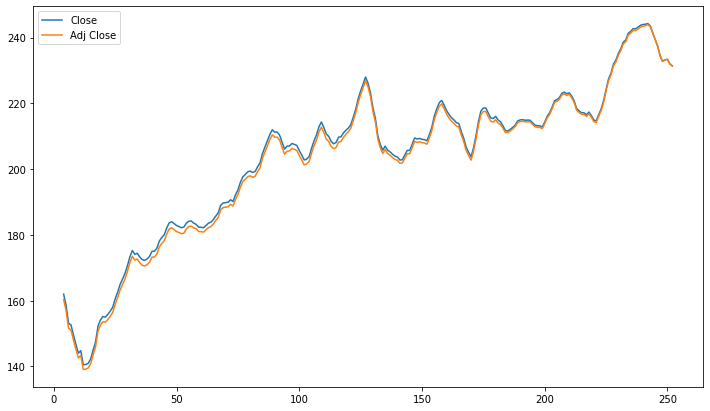

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

**Ejemplo**

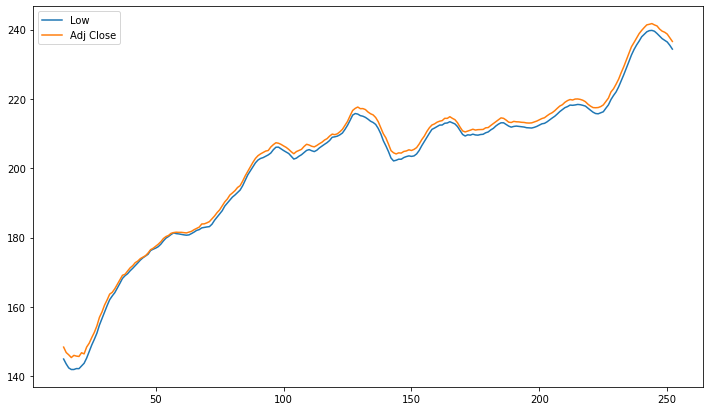

In [ ]:
aapl.rolling(15)[['Low', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

TypeError: ignored

**Ejemplo**

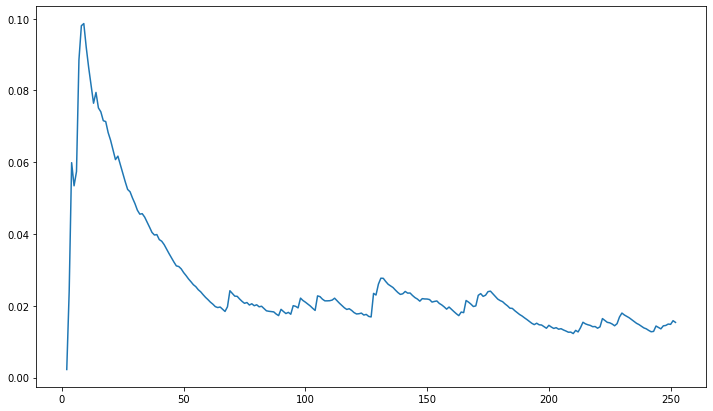

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

**Ejemplo**

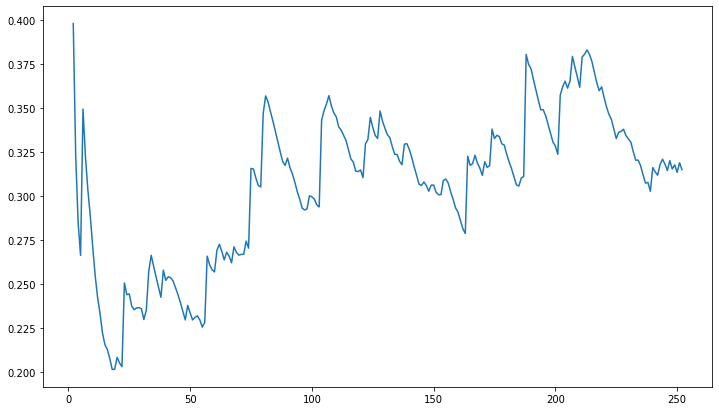

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Volume'].pct_change().ewm(span=60).std().plot();

# "Real World" Data

In [6]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [16]:
## Needed Libraries.
from urllib.parse import urlencode 
import pandas as pd

import requests

## In this case, we will obtain TOMATOES data.
base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
query_params = {
  'class': ['Fruit'], ## Change Fruit with Vegetables
  'commodity': ['Avocados'], ## Change Avocados with Tomatoes
  'compareLy': ['No'],
  'endDate': ['01/01/2021'], ## Hardcoding end Date
  'repDate': ['01/01/2020'], ## Hardcoding rep Date
  'format': ['excel'],
  'organic': ['ALL'],
  'portal': ['fv'],
  'region': ['ALL'],
  'type': ['retail'],
}

## Build URL to send request.
url = base_url + '?' + urlencode(query_params, doseq=1)

## Request data from url
resp = requests.get(url, stream=True)

## Create File with data.
with open('data.html', 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
            f.close()

## Read data from file.
tomatoes_data = pd.read_html('data.html', header=0)[0] 
## Be careful, this data is uncleaned, If you want to use it correctly, you will first have to clean it


## You now have data of tomatoes in the United States! Hurra!

IndexError: ignored

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,212,1.81,NaN,NaN,NaN
1,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,NaN,NaN,per pound,46,3.34,NaN,NaN,NaN
2,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,Y,NaN,per pound,23,3.99,NaN,NaN,NaN
3,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,NaN,NaN,per pound,2255,1.66,NaN,NaN,NaN
4,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,Y,Greenhouse,per pound,245,1.48,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,VINE RIPES,NaN,Greenhouse,per pound,10,2.49,2.49,2.49,NaN
1919,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,250,1.92,1.49,1.99,NaN
1920,01/01/2021,HAWAII,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,4,2.29,2.29,2.29,NaN
1921,01/01/2021,ALASKA,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,34,2.49,2.39,2.49,NaN


In [8]:


avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


**Ejemplo**


In [11]:

tomatoes_data

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,212,1.81,NaN,NaN,NaN
1,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,NaN,NaN,per pound,46,3.34,NaN,NaN,NaN
2,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,Y,NaN,per pound,23,3.99,NaN,NaN,NaN
3,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,NaN,NaN,per pound,2255,1.66,NaN,NaN,NaN
4,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,Y,Greenhouse,per pound,245,1.48,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,VINE RIPES,NaN,Greenhouse,per pound,10,2.49,2.49,2.49,NaN
1919,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,250,1.92,1.49,1.99,NaN
1920,01/01/2021,HAWAII,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,4,2.29,2.29,2.29,NaN
1921,01/01/2021,ALASKA,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,34,2.49,2.39,2.49,NaN


In [9]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

**Ejemplo**

In [12]:
tomatoes_data.dtypes

Date                   object
Region                 object
Class                  object
Commodity              object
Variety                object
Organic                object
Environment            object
Unit                   object
Number of Stores        int64
Weighted Avg Price    float64
Low Price             float64
High Price            float64
% Marked Local        float64
dtype: object

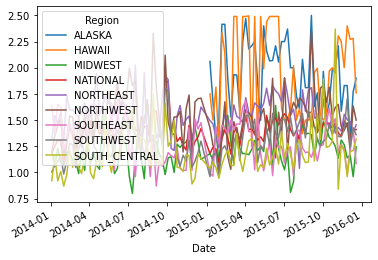

In [10]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

**Ejemplo**

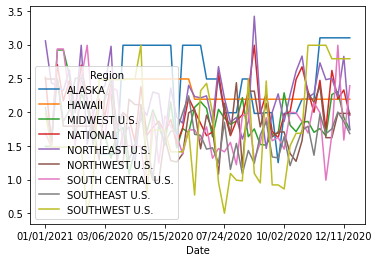

In [13]:
VINE_RIPES = tomatoes_data[tomatoes_data.Variety == 'VINE RIPES']
VINE_RIPES.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [22]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

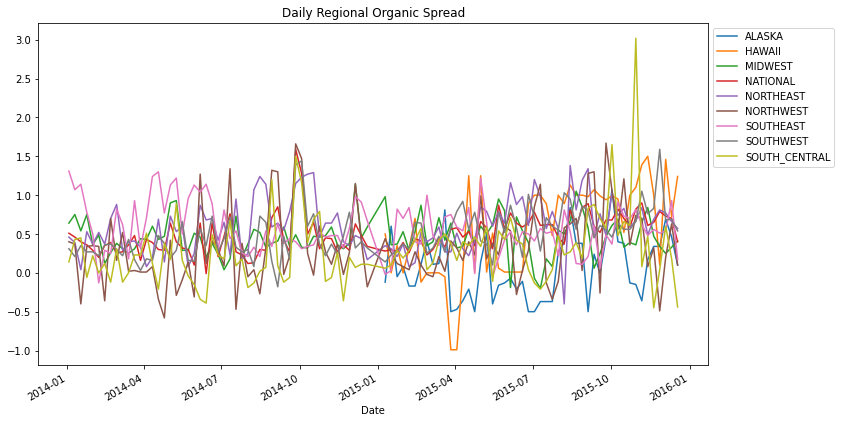

In [26]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

**Ejemplo**

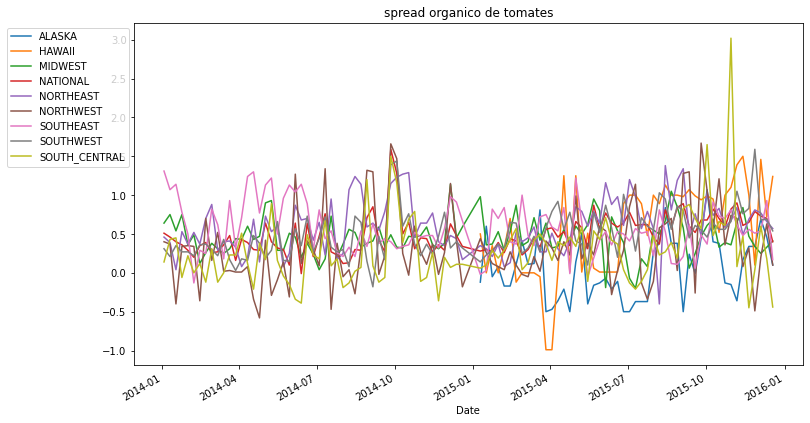

In [28]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("spread organico de tomates");
plt.legend(bbox_to_anchor=(0, 1));

In [29]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


**Ejemplo**

In [32]:
spread_correlationq = organic_spread_by_region(hass)
spread_correlationq

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Date,,,,,,,,,
2014-01-03 00:00:00+00:00,NaN,NaN,0.64,0.51,0.46,0.40,1.31,0.31,0.14
2014-01-10 00:00:00+00:00,NaN,NaN,0.75,0.46,0.39,0.37,1.07,0.21,0.43
2014-01-17 00:00:00+00:00,NaN,NaN,0.54,0.40,0.04,-0.40,1.14,0.35,0.45
2014-01-24 00:00:00+00:00,NaN,NaN,0.75,0.36,0.53,0.34,0.78,0.27,-0.06
2014-01-31 00:00:00+00:00,NaN,NaN,0.36,0.29,0.37,0.35,0.50,0.27,0.22
...,...,...,...,...,...,...,...,...,...
2015-11-20 00:00:00+00:00,0.34,1.00,0.47,0.65,0.69,0.32,0.56,0.83,-0.45
2015-11-27 00:00:00+00:00,0.34,0.10,0.34,0.79,0.81,-0.49,0.51,1.59,0.04
2015-12-04 00:00:00+00:00,0.69,1.46,0.25,0.73,0.77,0.20,0.54,0.68,0.60


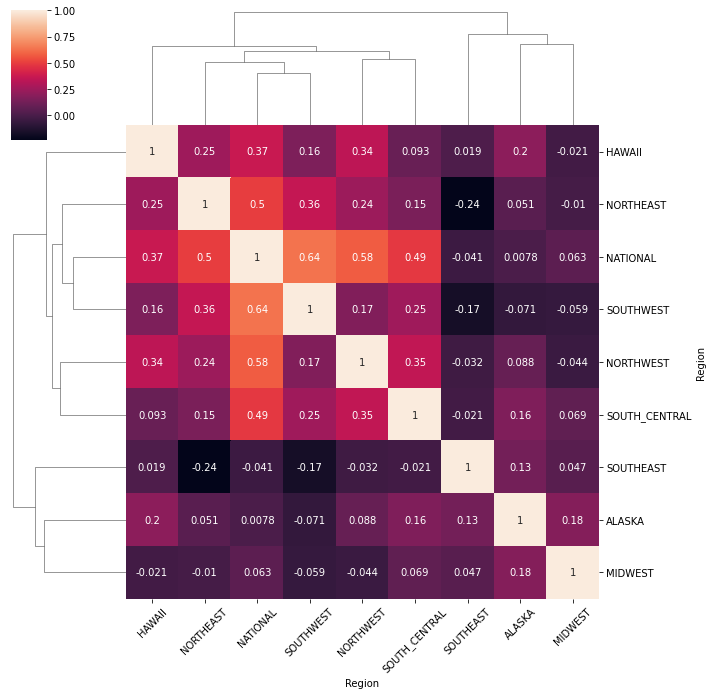

In [30]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**Ejemplo**

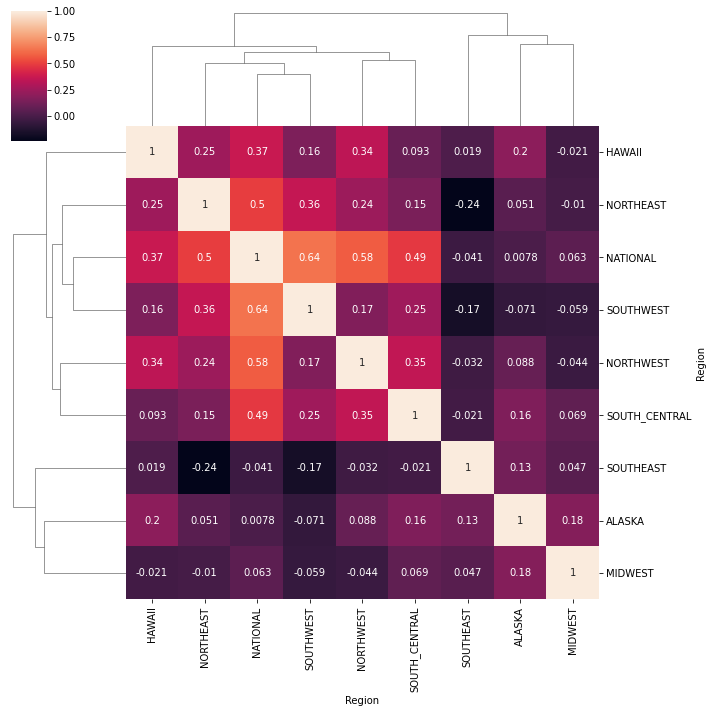

In [37]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[1]
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!